In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/training.1600000.processed.noemoticon[1].csv', delimiter=',', encoding='ISO-8859-1')

###Data Exploration

In [ ]:
df.shape

(1048572, 6)

In [ ]:
df.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
df.tail()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
1048567,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048568,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048569,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048570,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?
1048571,4,1960186607,Fri May 29 07:33:45 PDT 2009,NO_QUERY,sugababez,cant wait til her date this weekend


In [ ]:
df.columns

Index(['polarity of tweet ', 'id of the tweet', 'date of the tweet', 'query',
       'user', 'text of the tweet '],
      dtype='object')

In [ ]:
df['polarity of tweet\xa0'].value_counts()

0    799996
4    248576
Name: polarity of tweet , dtype: int64

In [ ]:
df.isna().sum()

polarity of tweet     0
id of the tweet       0
date of the tweet     0
query                 0
user                  0
text of the tweet     0
dtype: int64

In [ ]:
#shuffling the data for better testing and training
df= df.sample(frac =1)

In [ ]:
df.columns = ['sentiment','id','date','query','user','text']
df.head()

,sentiment,id,date,query,user,text
255981,0,1984618105,Sun May 31 15:27:54 PDT 2009,NO_QUERY,trsears,@spearmelba reading alan w. stuff hope the scr...
702817,0,2255519290,Sat Jun 20 11:23:08 PDT 2009,NO_QUERY,Void_Wizard,http://justmanga.com/ is down.
872036,4,1678879581,Sat May 02 07:58:12 PDT 2009,NO_QUERY,katchwreck,@Thebombshell happy birthday! aloha
562464,0,2205668108,Wed Jun 17 05:12:48 PDT 2009,NO_QUERY,rurunavira,"I've said it before, and I'd like to say it ag..."
202502,0,1972143054,Sat May 30 08:38:55 PDT 2009,NO_QUERY,carrie401kitten,Hmmm... I miss you.


In [ ]:
df = df[['sentiment','text']]

In [ ]:
#downsampling the dataset
from sklearn.utils import resample

In [ ]:
df_majority = df[df['sentiment']==0]
df_minority = df[df['sentiment']==4]
df_minority.shape

(248576, 2)

In [ ]:
df_majority_downsampled = resample(df_majority,
                                 replace=False,
                                 n_samples=len(df_minority),
                                 random_state=1234)
df = df_majority_downsampled.append(df_minority)

<ipython-input-8-4d87c130bc41>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_majority_downsampled.append(df_minority)


In [ ]:
df.head()

,sentiment,text
753231,0,Had a pretty amazing day shopping. Throat hurt...
581300,0,@r_o_y_a_n Video is only available on the 3GS ...
424056,0,Hamilton is starting 16th. Humiliating. #f1 #m...
143942,0,Its Friday! Its raining off to work
609304,0,@miahrose stop ignoring me! Ahaha. You having ...


In [ ]:
df.sentiment.value_counts()

0    248576
4    248576
Name: sentiment, dtype: int64

##Data preprocessing


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
remove = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()

corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

497152
@lmfaobikinigirl NO!!! Who do you want me to beat up?? Cheer up  Your biggest fans are here for you!!!


In [ ]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
corpus_f = []
corpus_joined = []
for i in df.index:

    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    text = text.lower()
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text=re.sub("(\\d|\\W)+"," ",text)
    text = text.split()
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text
            if not word in remove]
    text1 = " ".join(text)
    corpus_f.append(text)
    corpus_joined.append(text1)

In [ ]:
corpus_f[0]

['lmfaobikinigirl', 'want', 'beat', 'cheer', 'biggest', 'fan']

In [ ]:
corpus_joined[0]

'lmfaobikinigirl want beat cheer biggest fan'

In [ ]:
data= pd.DataFrame()
data["text"] = corpus_joined
data["sentiment"] = df["sentiment"].values
data.head()

,text,sentiment
0,lmfaobikinigirl want beat cheer biggest fan,0
1,sat home depressed,0
2,boby talk,0
3,lost nokia,0
4,spent whole day hospital endoscopy diagnosed s...,0


##EDA

In [ ]:
data_eda= pd.DataFrame()
data_eda["text"] = corpus_f
data_eda["sentiment"] = df["sentiment"].values
data.head()

,text,sentiment
0,lmfaobikinigirl want beat cheer biggest fan,0
1,sat home depressed,0
2,boby talk,0
3,lost nokia,0
4,spent whole day hospital endoscopy diagnosed s...,0


Storing positive and negative data separately

In [ ]:
positive = data_eda[data_eda['sentiment'] == 4]
positive_list = positive['text'].tolist()
negative = data_eda[data_eda['sentiment'] == 0]
negative_list = negative['text'].tolist()

In [ ]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

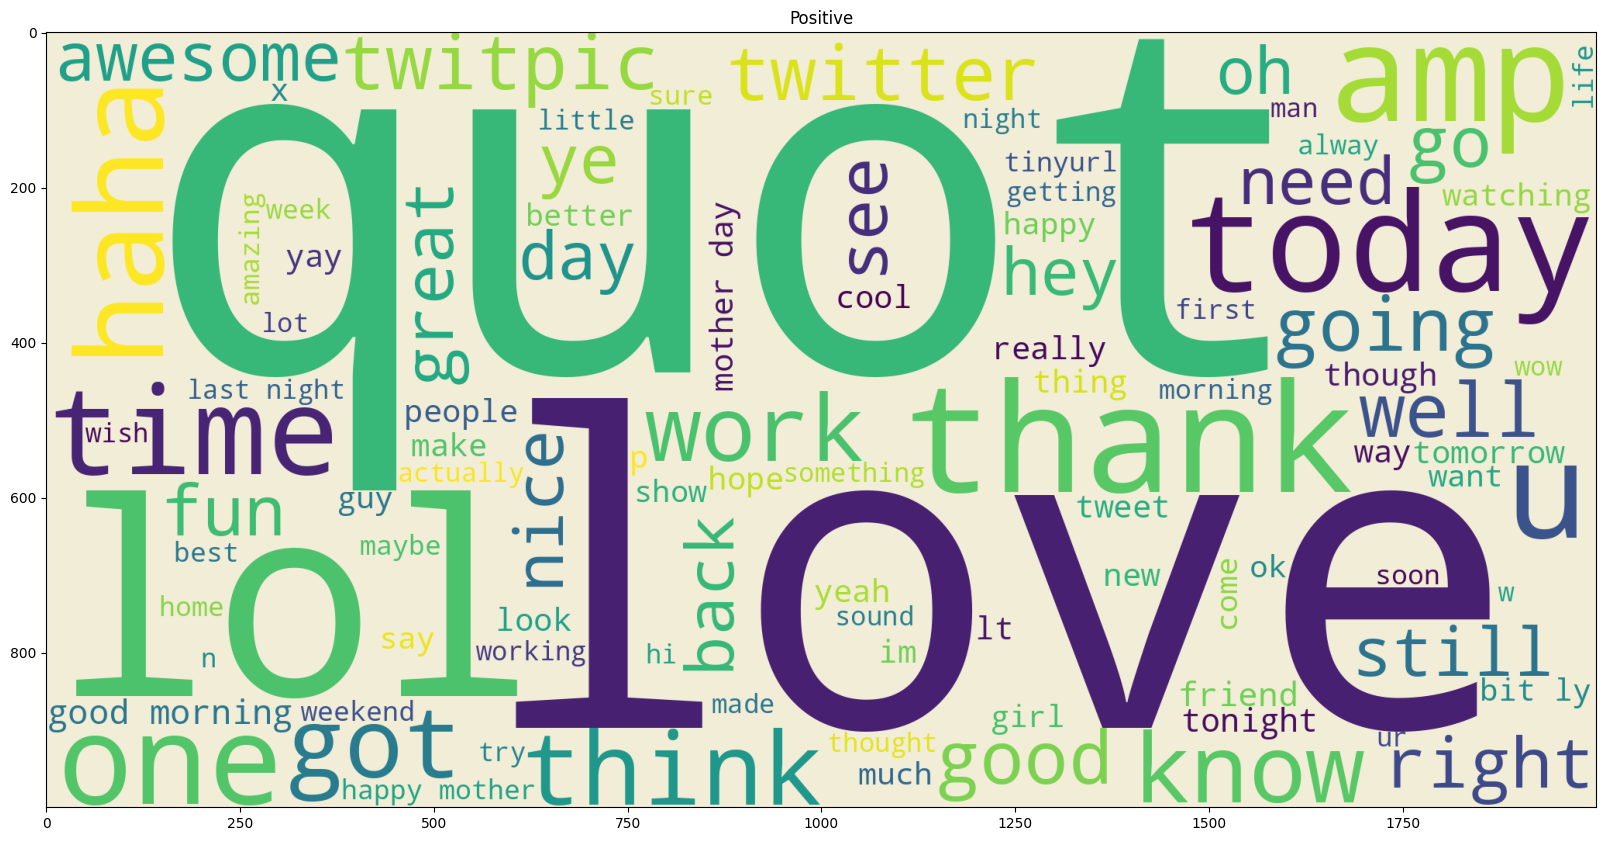

In [ ]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(positive_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

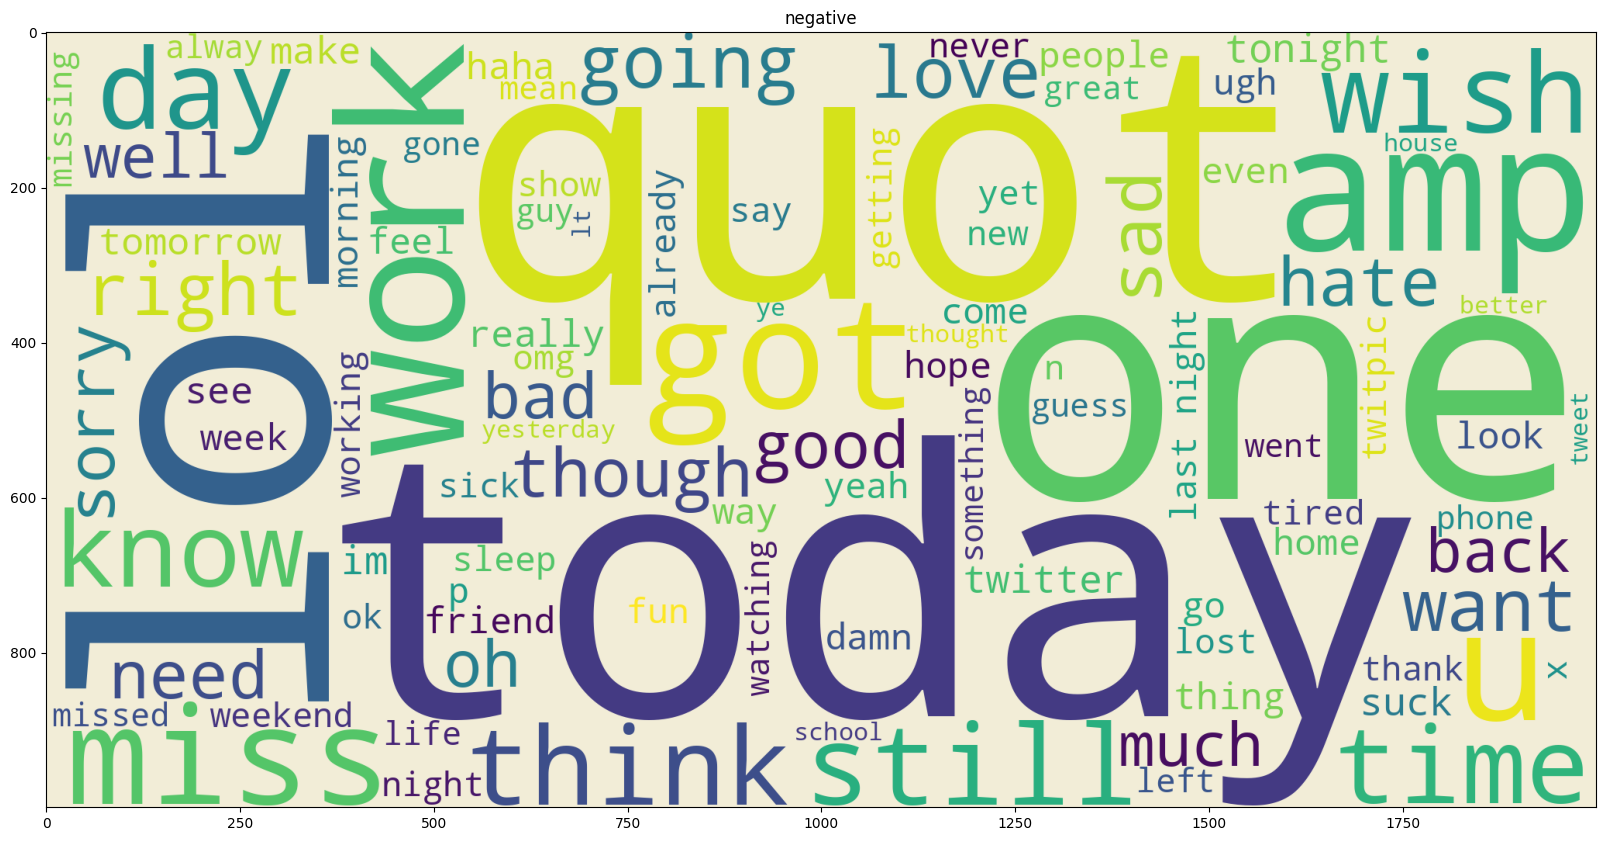

In [ ]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(negative_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

In [ ]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1

    return(dic)
count_corpus = get_count(positive_list)
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)

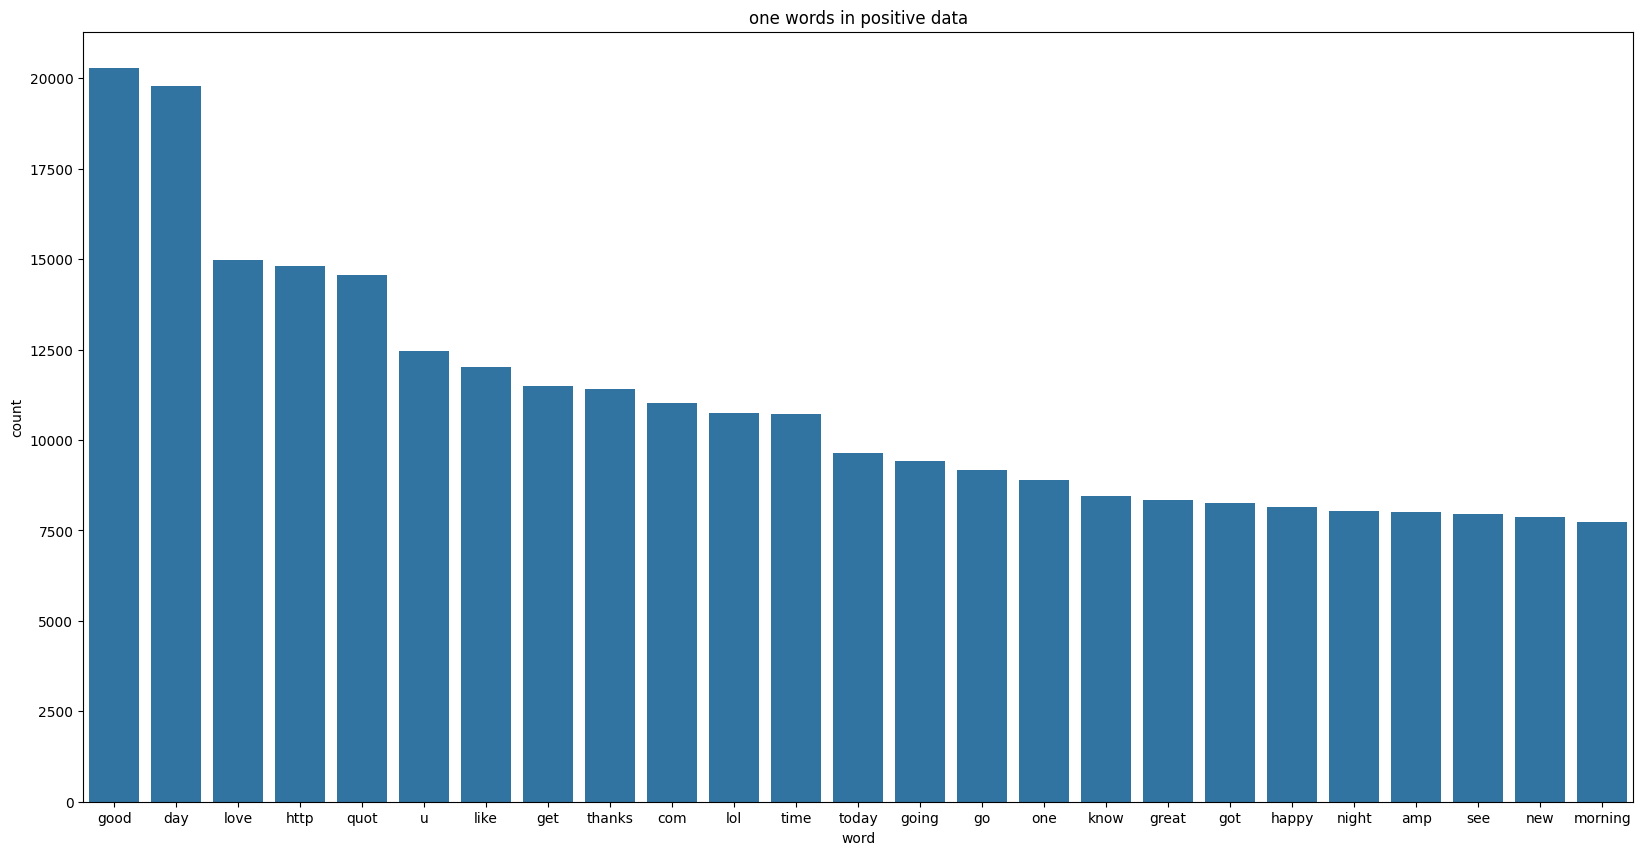

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = count_corpus["word"][:25], y = count_corpus["count"][:25])
plt.title('one words in positive data')
plt.show()


In [ ]:
count_corpusn=get_count(negative_list)
count_corpusn = dict(count_corpusn)
count_corpusn = pd.DataFrame({"word":count_corpusn.keys(),"count":count_corpusn.values()})
count_corpusn = count_corpusn.sort_values(by = "count", ascending = False)

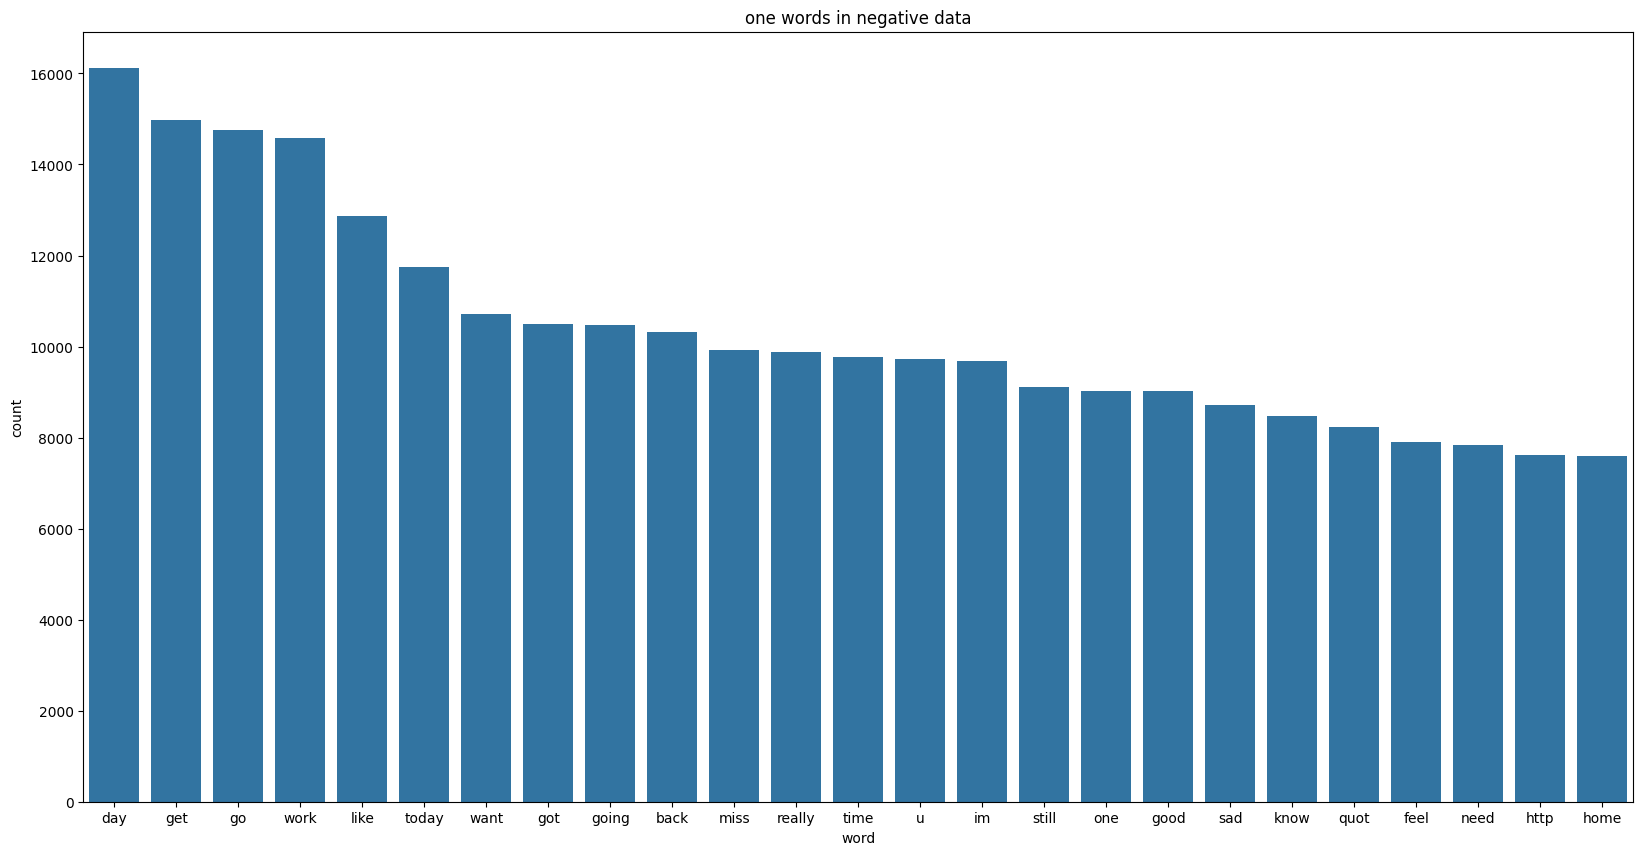

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = count_corpusn["word"][:25], y = count_corpusn["count"][:25])
plt.title('one words in negative data')
plt.show()

##Text Vectorization:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(data['text'])
y = data['sentiment']


##Model selection


####Multinomial Naive bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vector, y, test_size=0.2, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 76.68%

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77     49666
           4       0.79      0.73      0.76     49765

    accuracy                           0.77     99431
   macro avg       0.77      0.77      0.77     99431
weighted avg       0.77      0.77      0.77     99431



####Linear support vector machine

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svc = LinearSVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 77.55%

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     49666
           4       0.77      0.79      0.78     49765

    accuracy                           0.78     99431
   macro avg       0.78      0.78      0.78     99431
weighted avg       0.78      0.78      0.78     99431



In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 78.23%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78     49666
           4       0.77      0.81      0.79     49765

    accuracy                           0.78     99431
   macro avg       0.78      0.78      0.78     99431
weighted avg       0.78      0.78      0.78     99431



###Cross-Validation:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

X = vector
y = data['sentiment']

In [ ]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
for fold, (train_idx, test_idx) in enumerate(cv_strategy.split(X, y), 1):
    X_train_fold, X_test_fold = X[train_idx], X[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    lr.fit(X_train_fold, y_train_fold)
    y_pred_fold = lr.predict(X_test_fold)

    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(f'\nClassification Report - Fold {fold}:')
    print(classification_report(y_test_fold, y_pred_fold))
    print(f'Accuracy - Fold {fold}: {accuracy_fold * 100:.2f}%')


Classification Report - Fold 1:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77     49716
           4       0.76      0.80      0.78     49715

    accuracy                           0.78     99431
   macro avg       0.78      0.78      0.78     99431
weighted avg       0.78      0.78      0.78     99431

Accuracy - Fold 1: 77.61%

Classification Report - Fold 2:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78     49715
           4       0.77      0.81      0.79     49716

    accuracy                           0.78     99431
   macro avg       0.78      0.78      0.78     99431
weighted avg       0.78      0.78      0.78     99431

Accuracy - Fold 2: 78.19%

Classification Report - Fold 3:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77     49715
           4       0.77      0.80      0.78     49715

    accuracy                   

###Model Interpretability:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

lr = LogisticRegression(max_iter=1000)
lr.fit(vector, y)
calibrated_lr = CalibratedClassifierCV(lr, method='sigmoid', cv='prefit')
calibrated_lr.fit(vector, y)

CalibratedClassifierCV(cv='prefit', estimator=LogisticRegression(max_iter=1000))

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=d79de68e42091e1ccc0595e291983fa46fd332b2012dd07c436b14fda12b38dc
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
coefficients = lr.coef_.flatten()
feature_names = tfidf.get_feature_names_out()

feature_importance_dict = dict(zip(feature_names, coefficients))


In [ ]:
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

top_n = 10
print(f'Top {top_n} Important Features:')
for feature, importance in sorted_feature_importance[:top_n]:
    print(f'{feature}: {importance:.4f}')


Top 10 Important Features:
sad: -12.4296
miss: -8.3889
sadly: -7.8093
poor: -7.7279
missing: -6.9786
unfortunately: -6.7569
bummed: -6.7065
thanks: 6.6970
thank: 6.4571
sorry: -6.4123


In [ ]:
from lime.lime_text import LimeTextExplainer

sample_instance = [data['text'].iloc[0]]

explainer = LimeTextExplainer(class_names=['negative', 'positive'])

predict_proba_function = lambda x: calibrated_lr.predict_proba(tfidf.transform(x))

explanation = explainer.explain_instance(sample_instance[0], predict_proba_function, num_features=10)

print('\nLIME Explanation:')
explanation.show_in_notebook(text=True)


LIME Explanation:


###Evaluation Metrics

Confusion Matrix:
[[37605 12061]
 [ 9586 40179]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78     49666
           4       0.77      0.81      0.79     49765

    accuracy                           0.78     99431
   macro avg       0.78      0.78      0.78     99431
weighted avg       0.78      0.78      0.78     99431



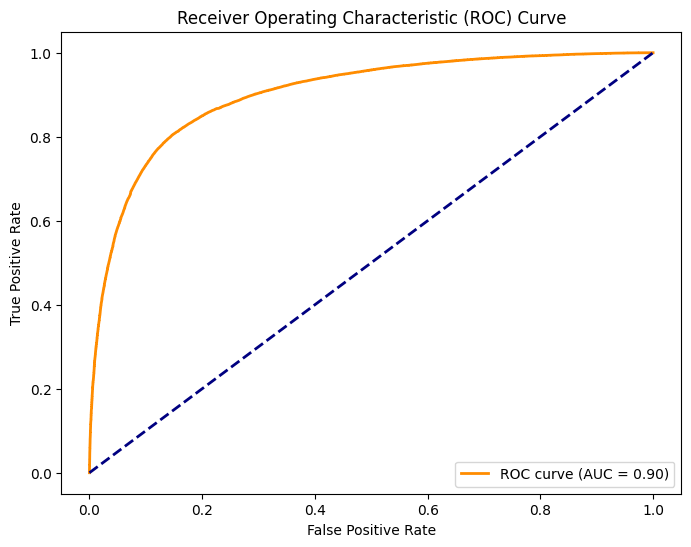

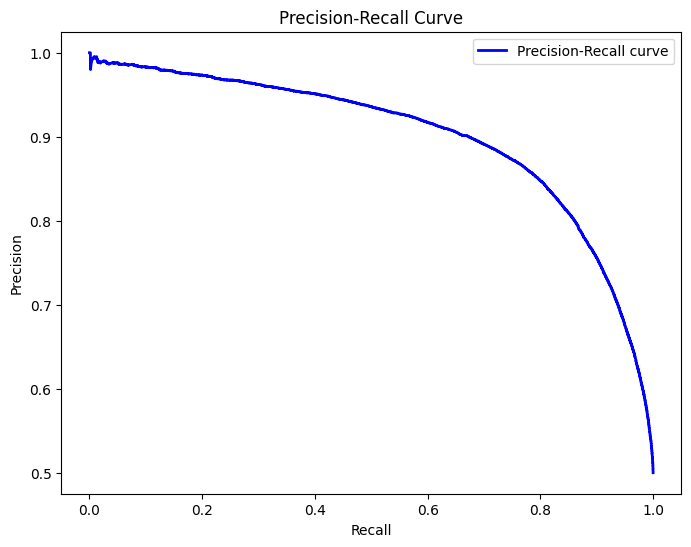

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

binary_y_test = (y_test == 4).astype(int)

probabilities = calibrated_lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(binary_y_test, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

precision, recall, _ = precision_recall_curve(binary_y_test, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()
